<div class="image-container">
  <img class="image" src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Logo-ITESO-Vertical-SinFondo-png.png" width="300" height="300" style="float: right">
</div>


<p>
    <font style = "font-family:Cambria">          
    <h2><font color="#191970" size = 6 >
        1 Microstructure
    </font></h2>         
    <br>         
    <font color='navy' size = 6>Project 1</font>
    <br> 
    <h3><font size =4>Collaborators:</font></h3> 
    <ul>
        <li>Ana Sofia Brizuela Casarin</li>
        <li>Samuel Alejandro Perez Avalos</li>
        <li>Juan Antonio Mugica Liparoli</li>
    </ul>               
    </font>
</p>

In [41]:
import jupyterthemes as jt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import tqdm
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.integrate import quad
import numpy as np
from scipy.optimize import minimize

* Plot the price distribution

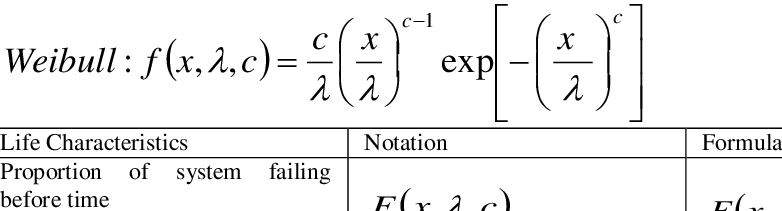

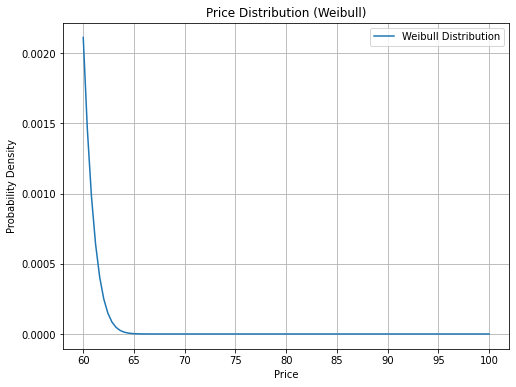

In [42]:
# Definir la función de densidad de Weibull(lambda=50, K=10)
def Weibull_pdf(x, lambda_, K):
    return (K / lambda_) * ((x / lambda_) ** (K - 1)) * np.exp(- (x / lambda_) ** K)

# Parámetros de la distribución lognormal
S = 51
lambda_ = 50
K = 10

# Definir el rango de valores de precios centrados alrededor de 60
price_range = np.linspace(60.00001, 100, 100)  # Se inicia en 0.1 para evitar división por cero

# Calcular la función de densidad de probabilidad (PDF) para cada precio
pdf_values = Weibull_pdf(price_range, lambda_, K)

# Crear el gráfico de la distribución de precios
plt.figure(figsize=(8, 6))
plt.plot(price_range, pdf_values, label='Weibull Distribution')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.title('Price Distribution (Weibull)')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def expected_revenue_no_informed(S0, S, lambda_, K, P_BL, P_SL, Ka, Kb):
    # Definir la función de densidad de probabilidad de la distribución Weibull
    def Weibull_pdf(x, lambda_, K):
        return (K / lambda_) * ((x / lambda_) ** (K - 1)) * np.exp(- (x / lambda_) ** K)
    
    # Calcular las integrales numéricamente
    integral1 = np.exp(-0.5 * ((np.log(Ka / S) / K) ** 2)) / (S * K * np.sqrt(2 * np.pi))
    integral2 = np.exp(-0.5 * ((np.log(Kb / S) / K) ** 2)) / (S * K * np.sqrt(2 * np.pi))
    
    # Calcular el valor esperado de revenue
    expected_revenue = (P_BL * (Ka - S0) + P_SL * (S0 - Kb)) - (integral1 + integral2)
    
    return expected_revenue

def expected_revenue_with_informed(S0, S, lambda_, K, P_I, P_BL, P_SL, Ka, Kb):
    # Definir la función de densidad de probabilidad de la distribución Weibull
    def Weibull_pdf(x, lambda_, K):
        return (K / lambda_) * ((x / lambda_) ** (K - 1)) * np.exp(- (x / lambda_) ** K)
    
    # Calcular las integrales numéricamente
    integral1 = np.exp(-0.5 * ((np.log(Ka / S) / K) ** 2)) / (S * K * np.sqrt(2 * np.pi))
    integral2 = np.exp(-0.5 * ((np.log(Kb / S) / K) ** 2)) / (S * K * np.sqrt(2 * np.pi))
    
    # Calcular el valor esperado de revenue
    expected_revenue = (1 - P_I) * (P_BL * (Ka - S0) + P_SL * (S0 - Kb)) - P_I * (integral1 + integral2)
    
    return expected_revenue

# Parámetros dados
S0 = 51
S = 45
lambda_ = 50
K = 10
P_I = 0.4
P_BL = 0.5
P_SL = 0.5

# Calcular el Expected Revenue para una serie de valores de ask spread
ask_spreads = np.linspace(0, 10, 100)
expected_revenues_no_informed = []
expected_revenues_with_informed = []

for ask_spread in ask_spreads:
    Ka = S0 + ask_spread
    Kb = S0 - ask_spread
    expected_revenues_no_informed.append(expected_revenue_no_informed(S0, S, lambda_, K, P_BL, P_SL, Ka, Kb))
    expected_revenues_with_informed.append(expected_revenue_with_informed(S0, S, lambda_, K, P_I, P_BL, P_SL, Ka, Kb))


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def expected_revenue(S0, S, lambda_, K, P_I, P_BL, P_SL, Ka, Kb):
    # Definir la función de densidad de probabilidad de la distribución Weibull
    def Weibull_pdf(x, lambda_, K):
        return (K / lambda_) * ((x / lambda_) ** (K - 1)) * np.exp(- (x / lambda_) ** K)
    
    # Calcular las integrales numéricamente
    integral1, _ = quad(lambda x: (x - Ka) * Weibull_pdf(x, lambda_, K), Ka, 100)
    integral2, _ = quad(lambda x: (Kb - x) * Weibull_pdf(x, lambda_, K), 0, Kb)
    
    # Calcular el valor esperado de revenue
    expected_revenue = (1 - P_I) * (P_BL * (Ka - S0) + P_SL * (S0 - Kb)) - P_I * (integral1 + integral2)
    
    return expected_revenue

# Parámetros dados
S0 = 51
lambda_ = 50
K = 10
P_I = 0.4

# Calcular el Expected Revenue para una serie de valores de ask spread
ask_spreads = np.linspace(0, 10, 100)
expected_revenues = []

for ask_spread in ask_spreads:
    S = ask_spread

    Ka = S0 + S
    Kb = S0 - S
    PL = (1 - P_I)
    P_BL = 0.5 - 0.08 * ask_spread
    P_SL = 0.5 - 0.08 * (S - Kb)
    
    expected_revenues.append(expected_revenue(S0, S, lambda_, K, P_I, P_BL, P_SL, Ka, Kb))

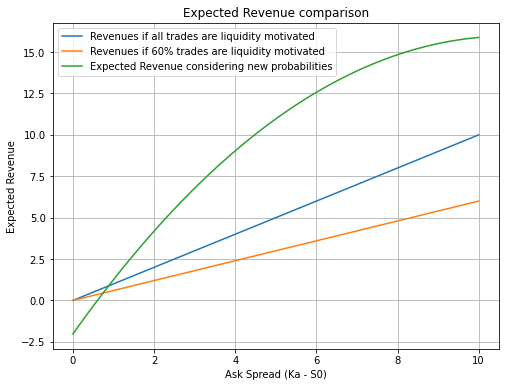

In [45]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(ask_spreads, expected_revenues_no_informed, label='Revenues if all trades are liquidity motivated')
plt.plot(ask_spreads, expected_revenues_with_informed, label='Revenues if 60% trades are liquidity motivated')
plt.plot(ask_spreads, expected_revenues, label='Expected Revenue considering new probabilities')
plt.xlabel('Ask Spread (Ka - S0)')
plt.ylabel('Expected Revenue')
plt.title('Expected Revenue comparison')
plt.legend()
plt.grid(True)
plt.show()